In [28]:
cd C:\Users\chris\Desktop\programming\my-programming-mistakes 

C:\Users\chris\Desktop\programming\my-programming-mistakes


In [29]:
#PANDS Project: An Analysis of the Iris-Fisher data set
#Author: Chris Foley
#We start by importing modules used in the analysis
import pandas as pd #Used for manipulating the data-set
import matplotlib.pyplot as plt #Used for graphing data
import seaborn as sns #Addition to matplot.lib for more aesthetic graphing of data
sns.set_style('dark') #sets background style of seaborn graphs 
df = pd.read_csv('IRIS.csv') #reading in our data set from the selected directory

In [30]:
#With the data set in hand we're ready to analyse. I start by using two useful Pandas methods "df.info()" and "df.describe()" 
df.info() #Is a pandas method which outputs the number of columns, empty variables and type of object in the data-set.
#.info tells us we have four floats, one categorical object and no null values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [31]:
print(df.describe(include='all')) 
#A pandas method which outputs some descriptive statistics, e.g means, standard deviations, min and max values and some
#percentiles. By adding "(include='all') it includes information on any categorical data, in this case "species", 
#telling us there are three distinct types with a frequency of 50 variables each totalling 150. 
#Looking at our numerical data shows the highest value is for sepal length at 7.9cm. The next closest is petal length at 
#6.9cm. Sepal length is also the highest minimum value at 4.3cm. Petal width is the smallest value as measured by mean, 
#min and max, and has a similar standard deviation to sepal length (.82 and .76). Sepal width and petal length thus 
#represent the middle range of our data-set at 3 and 3.7 respectively. However, in spite of the closeness of their means, 
#we can't necessarily expect these scores to be clustered close together, as between them they have the smallest and 
#largest standard deviations, at 0.4 for sepal width and 1.7 for petal length.

        sepal_length  sepal_width  petal_length  petal_width      species
count     150.000000   150.000000    150.000000   150.000000          150
unique           NaN          NaN           NaN          NaN            3
top              NaN          NaN           NaN          NaN  Iris-setosa
freq             NaN          NaN           NaN          NaN           50
mean        5.843333     3.054000      3.758667     1.198667          NaN
std         0.828066     0.433594      1.764420     0.763161          NaN
min         4.300000     2.000000      1.000000     0.100000          NaN
25%         5.100000     2.800000      1.600000     0.300000          NaN
50%         5.800000     3.000000      4.350000     1.300000          NaN
75%         6.400000     3.300000      5.100000     1.800000          NaN
max         7.900000     4.400000      6.900000     2.500000          NaN


[Text(0.5, 1.0, 'Histogram of Iris Sepal Length')]

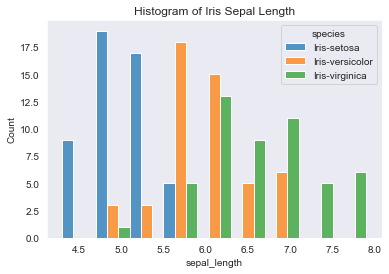

In [38]:
#Next we plot Histograms of the three plants for each variable,starting with Sepal Length.
sns.histplot(data = df, x = 'sepal_length', hue = "species", multiple="dodge").set(title='Histogram of Iris Sepal Length')
#"x" provides the variable we're looking at the frequency of, while "Hue" tells Seaborn to divide the scores 
#according to out categorical variable column "species". "dodge" tells Seaborn to present the graphs side by side
#and not overlapping or on top of one another. Finally we use ".set(title" to title our Histograms. The legend is 
#automatically input by Seaborn's "hue" function.

#The resulting histogram shows that the Setosa plant has the shortest sepal length, with most of it's scores clustered 
#between 4.5 and 5.5cm. Iris-Virginica has the largest sepal length with most of it's scores clustered between 6 and 8cm. 
#Iris-Versicolor occupies the middle range between the two. This implies if we're looking at sepal length alone, an Iris 
#plant with a very long sepal is likely a Virginica. Conversely, a very short sepal indicates a Setosa. 

The resulting histogram shows that the Setosa plant has the shortest sepal length, with most of it's scores clustered 
between 4.5 and 5.5cm. Iris-Virginica has the largest sepal length with most of it's scores clustered between 6 and 8cm. 
Iris-Versicolor occupies the middle range between the two. This implies if we're looking at sepal length alone, an Iris 
plant with a very long sepal is likely a Virginica. Conversely, a very short sepal indicates a Setosa. 

[Text(0.5, 1.0, 'Histogram of Iris Petal Length')]

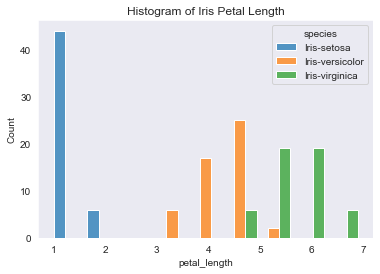

In [33]:
#Plots Histogram for Petal length.
sns.histplot(data = df, x = 'petal_length', hue = "species", multiple="dodge").set(title='Histogram of Iris Petal Length')

#Note Iris-Setosa is distinctly shorter than it's peers, with all of it's scores in a range of 1-2cm. Meanwhile Iris-Virginica 
#is again the longest with most of it's scores between 5.5 and 6 and it's highest coming in at 7. Iris-Versicolor is again in 
#the middle but this time with less overlap than in sepal length. Meaning when it comes to petal petal length we can be 
#reasonably assured a length of 1-2cm indicates a Setosa, a length of 3-5cm a Versicolor and a length of 5-7 a Virginica. 
#Briefly summarised, our findings on length are that Iris-Setosa is the shortest, Virginica is the longest. 


[Text(0.5, 1.0, 'Histogram of Iris Sepal Width')]

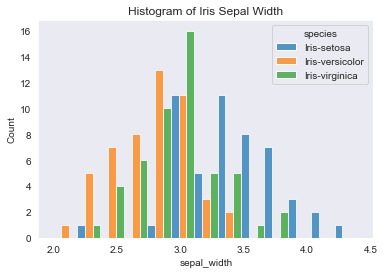

In [7]:
#Plots Histogram for Sepal Width
sns.histplot(data = df, x = 'sepal_width', hue = "species", multiple="dodge").set(title='Histogram of Iris Sepal Width')

#Now we move on to Sepal width where we can see a much denser distribution around 2.5 and 3.5cm for each species. On the wider 
#end of the spectrum sit's the Setosa while the narrowest plant is the Versicolor. Iris-Virginica occupies the middle when it 
#comes to width. Overall though these scores are much closer together and therefore less likely to be reliable predictors of 
#species type by themselves. Though taken with our previous insights, if an Iris is very short and very wide it's probably a 
#Setosa.

[Text(0.5, 1.0, 'Histogram of Iris Petal Width')]

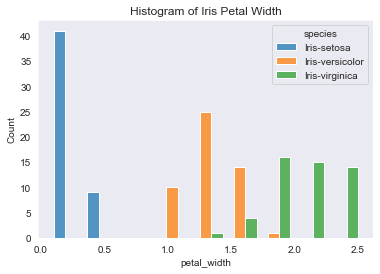

In [8]:
sns.histplot(data = df, x = 'petal_width', hue = "species", multiple="dodge").set(title='Histogram of Iris Petal Width')

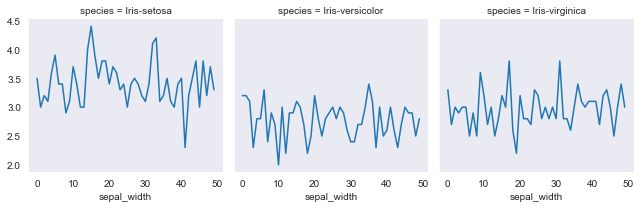

In [9]:
# Plots line map of 3 species in line
plot = sns.FacetGrid(df, col="species")#Takes data and column as input.
plot.map(plt.plot, "sepal_width")#This line tells Seaborn what variable to plot.  

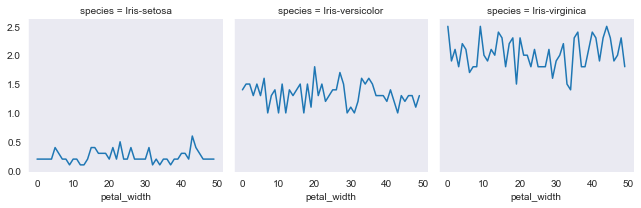

In [10]:
plot = sns.FacetGrid(df, col="species") 
plot.map(plt.plot, "petal_width")

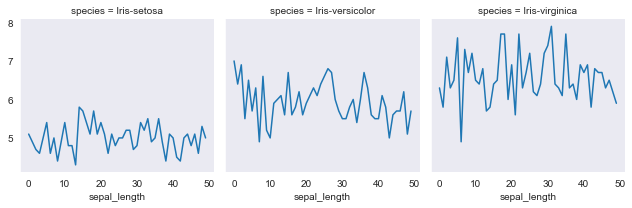

In [11]:
plot = sns.FacetGrid(df, col="species") 
plot.map(plt.plot, "sepal_length")

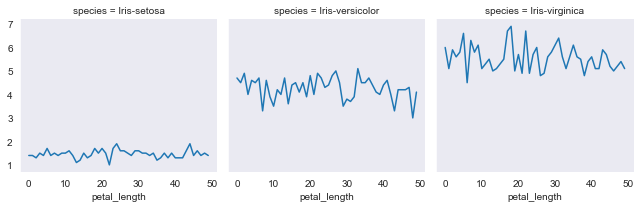

In [12]:
plot = sns.FacetGrid(df, col="species") 
plot.map(plt.plot, "petal_length")

In [13]:
print(df.corr()) #Prints correlation table for data

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


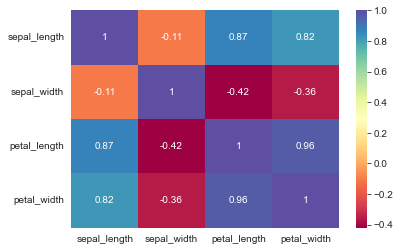

In [14]:
dataplot = sns.heatmap(df.corr(), cmap="Spectral", annot=True)#prints heatmap of correlations, "cmap" chooses color scheme. 
#Setting "annot" to "True" tells Seaborn to display the numerical values of each relation in each cell making for 
#better readability 

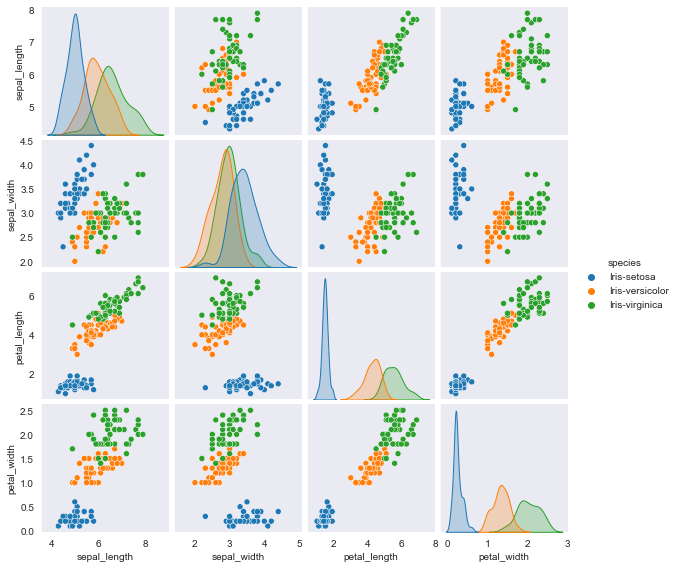

In [15]:
# compares each pair of variables by species
sns.pairplot(df, hue='species', height=2) 

In [16]:
plt.show()